In [29]:
import glob
import imageio.v2 as imageio
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from enum import IntEnum
import itertools
from skimage.metrics import structural_similarity as ssim

In [17]:
# Change class 
which_class = 0

In [18]:
# Get 10 images of a particular class for experimental and simulated data
root_dir = # provide file name here
exp_class_dir = ["Class1/", "Class2/", "Class3/",
                "Class4/", "Class5/", "Class6/",
                "Class7/", "Class8/", "Class9/",
                "Class10/", "Class11/", "Class12/",
                "Class13/", "Class14/", "Class15/"]
sim_class_dir = ["Revised_Sim_phi_12_01/", "Revised_Sim_phi_12_02/", "Revised_Sim_phi_12_10/",
            "Revised_Sim_phi_12_12/", "Revised_Sim_phi_12_23/", "Revised_Sim_phi_23_01/",
            "Revised_Sim_phi_23_02/", "Revised_Sim_phi_23_10/", "Revised_Sim_phi_23_12/",
            "Revised_Sim_phi_23_23/", "Revised_Sim_phi_31_01/", "Revised_Sim_phi_31_02/",
            "Revised_Sim_phi_31_10/", "Revised_Sim_phi_31_12/", "Revised_Sim_phi_31_23/"]

file_dir = '*.png'

def func_filename_list(folder_name, class_dir, which_class = 0):
    folder_name = root_dir+folder_name+class_dir[which_class]+file_dir
    folder_image = []
    count = 0
    filename_list = []
    for filename in glob.glob(folder_name):
        filename_list.append(filename)
    return filename_list

experimental_filename_list = func_filename_list("Experimental/", exp_class_dir, which_class)
simulated_filename_list = func_filename_list("1000eachClass/", sim_class_dir, which_class)

In [19]:
# Take 10 images of experimental and simulated data
n = 10
random.seed(2022)
n_experimental_filename_list = random.sample(experimental_filename_list, n)
n_simulated_filename_list = random.sample(simulated_filename_list, n)

experimental_data = []
for filename in n_experimental_filename_list:
    im=imageio.imread(filename)
    experimental_data.append(im)
experimental_data = np.array(experimental_data)

simulated_data = []
for filename in n_simulated_filename_list:
    im=imageio.imread(filename)
    simulated_data.append(im)
simulated_data = np.array(simulated_data)

In [ ]:
# SSIM for experiment vs experiment
dict_exp_exp = {}
for i in range(n):
    temp_list = []
    for j in range(n):
        temp_list.append(ssim(experimental_data[i], experimental_data[j])[0])
    dict_exp_exp[i] = temp_list
SSIM_exp_exp =pd.DataFrame(dict_exp_exp)

# SSIM for simulated vs simulated
dict_sim_sim = {}
for i in range(n):
    temp_list = []
    for j in range(n):
        temp_list.append(ssim(simulated_data[i], simulated_data[j])[0])
    dict_sim_sim[i] = temp_list
SSIM_sim_sim =pd.DataFrame(dict_sim_sim)

# SSIM for experimental vs simulated
# In data frame Row is experiemntal and column is simulated
dict_exp_sim = {}
for i in range(n):
    temp_list = []
    for j in range(n):
        temp_list.append(ssim(experimental_data[i], simulated_data[j])[0])
    dict_exp_sim[i] = temp_list
SSIM_exp_sim =pd.DataFrame(dict_exp_sim)

In [8]:
index = ["Sim1", "Sim2", "Sim3", "Sim4", "Sim5", "Sim6", "Sim7", "Sim8", "Sim9", "Sim10"]
df_exp_sim = pd.DataFrame({"Exp1": dict_exp_sim[0], "Exp2": dict_exp_sim[1], "Exp3": dict_exp_sim[2], 
                   "Exp4": dict_exp_sim[3], "Exp5": dict_exp_sim[4], "Exp6": dict_exp_sim[5], 
                   "Exp7": dict_exp_sim[6], "Exp8": dict_exp_sim[7], "Exp9": dict_exp_sim[8], 
                   "Exp10": dict_exp_sim[9], }, index=index)

index = ["Exp1", "Exp2", "Exp3", "Exp4", "Exp5", "Exp6", "Exp7", "Exp8", "Exp9", "Exp10"]
df_exp_exp = pd.DataFrame({"Exp1": dict_exp_exp[0], "Exp2": dict_exp_exp[1], "Exp3": dict_exp_exp[2], 
                   "Exp4": dict_exp_exp[3], "Exp5": dict_exp_exp[4], "Exp6": dict_exp_exp[5], 
                   "Exp7": dict_exp_exp[6], "Exp8": dict_exp_exp[7], "Exp9": dict_exp_exp[8], 
                   "Exp10": dict_exp_exp[9], }, index=index)

index = ["Sim1", "Sim2", "Sim3", "Sim4", "Sim5", "Sim6", "Sim7", "Sim8", "Sim9", "Sim10"]
df_sim_sim = pd.DataFrame({"Sim1": dict_sim_sim[0], "Sim2": dict_sim_sim[1], "Sim3": dict_sim_sim[2], 
                   "Sim4": dict_sim_sim[3], "Sim5": dict_sim_sim[4], "Sim6": dict_sim_sim[5], 
                   "Sim7": dict_sim_sim[6], "Sim8": dict_sim_sim[7], "Sim9": dict_sim_sim[8], 
                   "Sim10": dict_sim_sim[9], }, index=index)

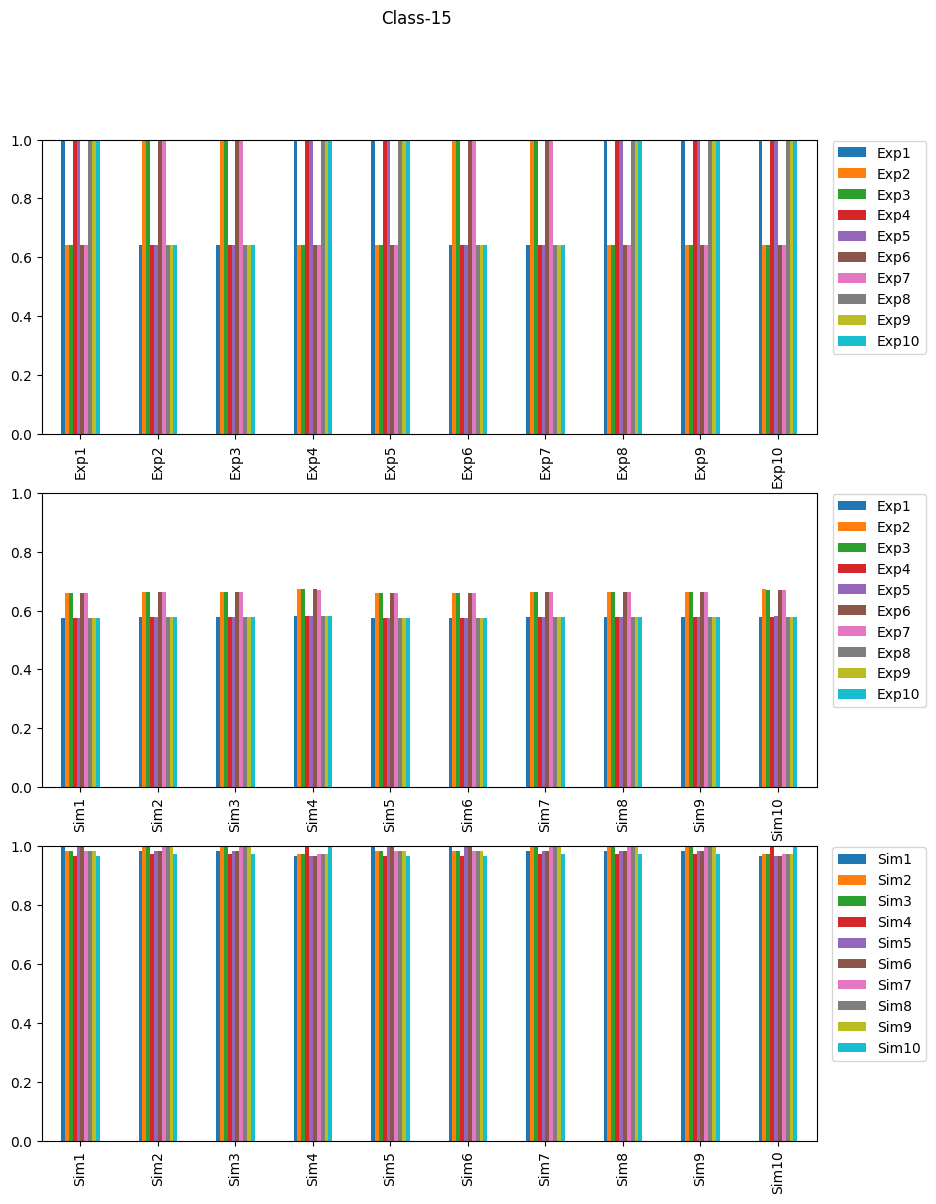

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=1)
fig.suptitle("Class-" + str(which_class+1))
df_exp_exp.plot.bar(ax = axes[0], ylim = (0,1), figsize=(10, 13))
axes[0].legend(loc='upper right', bbox_to_anchor = (1.15, 1.02))

df_exp_sim.plot.bar(ax = axes[1], ylim = (0,1), figsize=(10, 13))
axes[1].legend(loc='upper right', bbox_to_anchor = (1.15, 1.02))

df_sim_sim.plot.bar(ax = axes[2], ylim = (0,1), figsize=(10, 13))
axes[2].legend(loc='upper right', bbox_to_anchor = (1.15, 1.02))

fig.savefig("SSIM_class" + str(which_class + 1) + ".png")